In [5]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt


In [6]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]


In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/7f53ab1a8f6fe32991b7ed7eb8930952aaba0910/unit03_mult_lin_reg/exp1.csv',header=None,delim_whitespace=False,names=names,na_values='?')

In [8]:
df.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01
5,0.05,-0.000007,2.4958,-1.1345,-1.521500e-23,-4.940656e-321,3.252600e-04,-0.088425,-0.42342,-0.29589,-269.25,-114.15,2.4066,-0.08059,2.164600e-20,-1.141292e-321,2.930300e-01


In [9]:

t=np.array(df['t'])
y=np.array(df['I2'])
print(t)

[0.000e+00 1.000e-02 2.000e-02 ... 7.997e+01 7.998e+01 7.999e+01]


In [10]:
print(y)

[-0.40812  -0.37241  -0.40302  ...  0.06802   0.011903  0.037411]


In [11]:
import matplotlib
import matplotlib.pyplot as plt

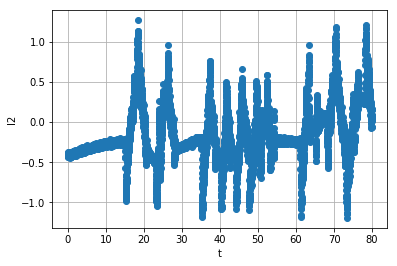

In [12]:
plt.plot(t,y,'o')
plt.xlabel('t')
plt.ylabel('I2')
plt.grid(True)

In [13]:
ytrain=y
xtrain=df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]

In [14]:
print(xtrain)

          q2            dq2    eps21    eps22     eps31     eps32  \
0     2.4958 -4.940656e-321 -269.250 -113.200   3.59180   1.57860   
1     2.4958 -4.940656e-321 -270.910 -116.050   1.45850  -1.73980   
2     2.4958 -4.940656e-321 -269.250 -112.970   3.59180   0.86753   
3     2.4958 -4.940656e-321 -269.970 -114.390   1.69560  -0.08059   
4     2.4958 -4.940656e-321 -269.970 -114.150   3.11770   0.86753   
5     2.4958 -4.940656e-321 -269.250 -114.150   2.40660  -0.08059   
6     2.4958 -4.940656e-321 -265.940 -108.940   7.38430   6.08220   
7     2.4958 -4.940656e-321 -271.860 -116.990  -0.43771  -2.45090   
8     2.4958 -4.940656e-321 -269.730 -114.150   2.88070   0.86753   
9     2.4958 -4.940656e-321 -269.730 -114.390   2.64370   0.39347   
10    2.4958 -4.940656e-321 -271.860 -116.050   1.45850  -1.73980   
11    2.4958 -4.940656e-321 -269.490 -112.970   2.88070   0.86753   
12    2.4958 -4.940656e-321 -270.200 -113.910   3.11770   0.86753   
13    2.4958 -4.940656e-321 -270.6

In [15]:
print(xtrain)

          q2            dq2    eps21    eps22     eps31     eps32  \
0     2.4958 -4.940656e-321 -269.250 -113.200   3.59180   1.57860   
1     2.4958 -4.940656e-321 -270.910 -116.050   1.45850  -1.73980   
2     2.4958 -4.940656e-321 -269.250 -112.970   3.59180   0.86753   
3     2.4958 -4.940656e-321 -269.970 -114.390   1.69560  -0.08059   
4     2.4958 -4.940656e-321 -269.970 -114.150   3.11770   0.86753   
5     2.4958 -4.940656e-321 -269.250 -114.150   2.40660  -0.08059   
6     2.4958 -4.940656e-321 -265.940 -108.940   7.38430   6.08220   
7     2.4958 -4.940656e-321 -271.860 -116.990  -0.43771  -2.45090   
8     2.4958 -4.940656e-321 -269.730 -114.150   2.88070   0.86753   
9     2.4958 -4.940656e-321 -269.730 -114.390   2.64370   0.39347   
10    2.4958 -4.940656e-321 -271.860 -116.050   1.45850  -1.73980   
11    2.4958 -4.940656e-321 -269.490 -112.970   2.88070   0.86753   
12    2.4958 -4.940656e-321 -270.200 -113.910   3.11770   0.86753   
13    2.4958 -4.940656e-321 -270.6

In [16]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [18]:
regr.intercept_

-0.08408083770451401

In [20]:
regr.coef_

array([ 0.06255018,  0.20584896,  0.00118784,  0.00044457, -0.0031362 ,
        0.00603298,  0.05487097])

In [21]:

y_tr_pred = regr.predict(xtrain)
RSS_tr = np.mean((y_tr_pred-ytrain)**2)/(np.std(ytrain)**2)
Rsq_tr = 1-RSS_tr
print("RSS per sample = {0:f}".format(RSS_tr))
print("R^2 =            {0:f}".format(Rsq_tr))

RSS per sample = 0.095833
R^2 =            0.904167


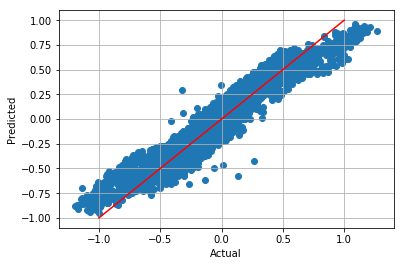

In [22]:
plt.scatter(ytrain,y_tr_pred)
plt.plot([-1,1],[-1,1],'r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.grid()

In [23]:
dft = pd.read_csv('https://raw.githubusercontent.com/sdrangan/introml/884429c24114ff17cc5ee7ef5bc855641b90dc94/unit03_mult_lin_reg/exp2.csv',header=None,delim_whitespace=False,names=names,na_values='?')

In [24]:
dft.head(6)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,1.9024,0.26063,-0.000364,4.940656e-321,0.012596,-0.096928,-0.15134,-0.017005,-130.83,-41.856,-6.3635,5.13410,-0.045712,6.210306e-319,1.582900
1,0.01,0.000013,1.9024,0.26073,0.000739,4.940656e-321,0.012095,-0.028908,-0.11903,-0.020406,-138.18,-51.100,-14.6590,-5.05820,0.125580,1.766878e-319,0.414660
2,0.02,-0.000007,1.9024,0.26086,-0.000580,4.940656e-321,0.011596,-0.059517,-0.13944,-0.047614,-139.36,-51.812,-14.6590,-5.29520,-0.130080,4.990557e-320,0.082286
3,0.03,0.000013,1.9024,0.26099,0.001409,4.940656e-321,0.013933,-0.079923,-0.15304,-0.023807,-135.57,-48.019,-11.3410,-0.79168,0.213010,1.394253e-320,0.190650
4,0.04,-0.000007,1.9024,0.26110,-0.001273,4.940656e-321,0.010793,-0.025507,-0.12924,-0.006802,-135.81,-49.204,-12.0520,-2.21390,-0.276490,3.581976e-321,-0.170400
5,0.05,-0.000007,1.9024,0.26124,0.001928,4.940656e-321,0.011915,-0.083324,-0.14964,-0.034010,-139.60,-53.471,-16.0820,-6.95450,0.323560,1.141292e-321,0.031745


In [32]:
X_test=dft[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']]
Y_test=np.array(dft['I2'])

In [33]:
print(X_test)

          q2            dq2   eps21   eps22    eps31     eps32           ddq2
0     1.9024  4.940656e-321 -130.83 -41.856  -6.3635   5.13410  6.210306e-319
1     1.9024  4.940656e-321 -138.18 -51.100 -14.6590  -5.05820  1.766878e-319
2     1.9024  4.940656e-321 -139.36 -51.812 -14.6590  -5.29520  4.990557e-320
3     1.9024  4.940656e-321 -135.57 -48.019 -11.3410  -0.79168  1.394253e-320
4     1.9024  4.940656e-321 -135.81 -49.204 -12.0520  -2.21390  3.581976e-321
5     1.9024  4.940656e-321 -139.60 -53.471 -16.0820  -6.95450  1.141292e-321
6     1.9024  4.940656e-321 -133.44 -45.412  -9.4448   1.10460 -7.905050e-323
7     1.9024  4.940656e-321 -134.86 -46.360 -10.8670  -0.55465 -7.905050e-323
8     1.9024  4.940656e-321 -135.33 -47.782 -10.8670  -1.26570 -7.905050e-323
9     1.9024  4.940656e-321 -132.73 -43.515  -8.2597   2.76380 -7.905050e-323
10    1.9024  4.940656e-321 -138.89 -51.812 -14.4220  -5.53230 -7.905050e-323
11    1.9024  4.940656e-321 -136.04 -48.256 -11.8150  -1.97680 -

In [34]:
print(Y_test)

[-0.15134 -0.11903 -0.13944 ... -0.28738 -0.29929 -0.3469 ]


In [35]:
Y_test_pred = regr.predict(X_test)
RSS_test = np.mean((Y_test_pred-Y_test)**2)/(np.std(Y_test)**2)
Rsq_test = 1-RSS_test
print("RSS per sample = {0:f}".format(RSS_test))
print("R^2 =            {0:f}".format(Rsq_test))

RSS per sample = 0.126780
R^2 =            0.873220


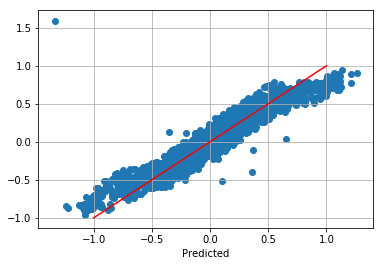

In [36]:

plt.scatter(Y_test,Y_test_pred)
plt.plot([-1,1],[-1,1],'r')
plt.xlabel('Actual')
plt.xlabel('Predicted')
plt.grid()